All libraries needed for this notebook outside of jupyter itself, run this cell to make sure you have the proper libraries.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage

Now lets apply the use of NumPy to basic real imagery analysis.

In [2]:
# Original Example taken from https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html

# Imported Python Libraries, skimage is short for scikit-image (this is the same for sklearn, which is scikit-learn)
from skimage import data
from skimage.filters import threshold_otsu

At this point you might be asking who or what is Otsu? Otsu Thresholding is usually applied to a 1D histogram of a grey-scale image to determine how to seperate the background and foreground of a real image. (Note: real image is used to describe images that might be taken from a camera). But what is a histogram?

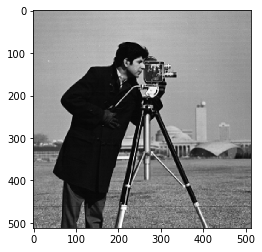

In [3]:
# Lets get a picture/image
image = data.camera() # note data is built-in data from the scikit-image package
# But what is this an image of
plt.imshow(image, cmap=plt.cm.gray) # imshow is show image from the matplotlib library
plt.show()

What is the Python object presenting the image variable?

In [4]:
type(image)

numpy.ndarray

In [5]:
print(image)
print(image.shape)
print(image.shape[0]*image.shape[1])

[[156 157 160 ... 152 152 152]
 [156 157 159 ... 152 152 152]
 [158 157 156 ... 152 152 152]
 ...
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]]
(512, 512)
262144


In [5]:
# 8-bit images are 0-255 black=0, white=255
print(np.max(image))
print(np.min(image))

255
0


(Wikipedia Paraphase)
A Histogram is an accurate representation of a data's distribution, whereas the data is grouped into bins and the height of each bin is representative of the frequency of occurence in the dataset. 

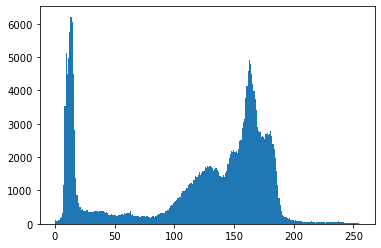

In [6]:
plt.hist(image.ravel(), bins=256)
plt.show()

Otsu Thresholding (and many other binary thresholding methods) operate on the assumption that the data has a bimodal distribution (two peaks separated by a strong trough). But what does a bimodal distribution look like?

In [7]:
distribution_size = image.shape[0]*image.shape[1]
print(distribution_size)
normal_example = np.random.normal(0, 1, distribution_size)
bimodal_example = np.random.multivariate_normal([0,5], [[1,0],[0,1]], distribution_size)
print(normal_example)
print(bimodal_example)

262144
[-0.32200954  0.39624835  0.451537   ...  1.39344312  1.41197558
 -0.12776975]
[[ 1.05470213  3.85949835]
 [ 1.10847374  3.78220275]
 [ 0.52249165  5.4287809 ]
 ...
 [-1.34726377  4.02344865]
 [ 0.20665877  5.10785302]
 [-0.3485261   5.91631894]]


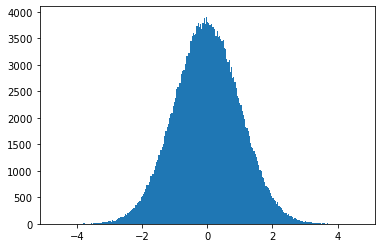

In [8]:
plt.hist(normal_example.ravel(), bins=256)
plt.show()

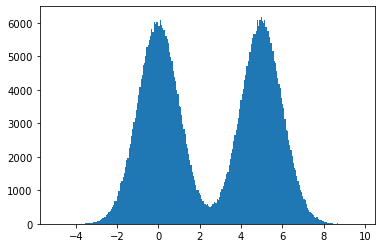

In [9]:
plt.hist(bimodal_example.ravel(), bins=256)
plt.show()

Otsu Thresholding on our toy datasets.

In [10]:
normal_otsu = threshold_otsu(normal_example.ravel())
bimodal_otsu = threshold_otsu(bimodal_example.ravel())
print(normal_otsu)
print(bimodal_otsu)

-0.022986635762727303
2.4450376906624167


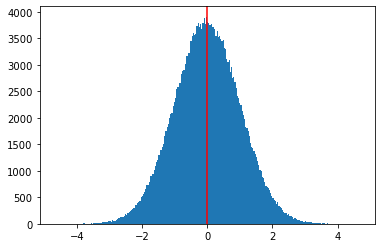

In [13]:
plt.hist(normal_example.ravel(), bins=256)
plt.axvline(normal_otsu, color='r')
plt.show()

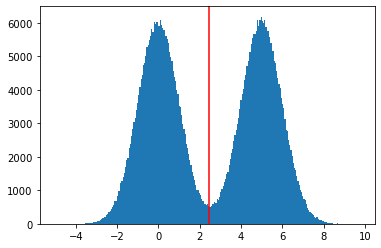

In [14]:
plt.hist(bimodal_example.ravel(), bins=256)
plt.axvline(bimodal_otsu, color='r')
plt.show()

Notice that Otsu for a normal distribution (Gaussian), the distribution is just split very closely to the mean = 0. However for the bimodal distribution Otsu correctly seperates the two normal distributions from each other. This is the intuition behind most binary image thresholding techniques with the major difference usually being how they determine where to place the threshold line.

Now lets try Otsu Thresholding on a real image.

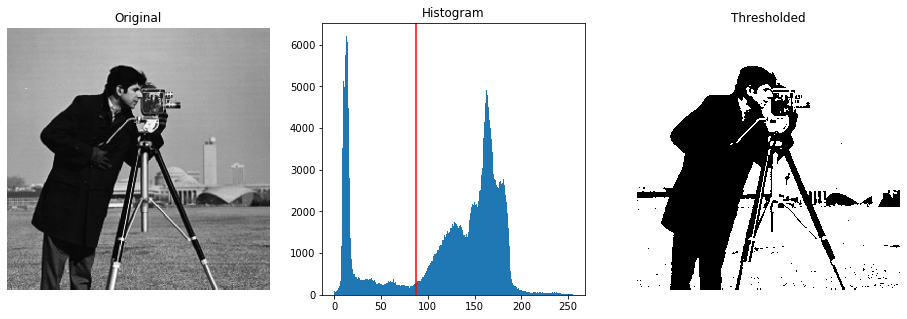

In [15]:
thresh = threshold_otsu(image)
binary = image > thresh # what is this line doing?

fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

While our original image has values from 0-255 as an 8-bit greyscale image, our thresholded image only has values 0 or 1 (i.e. background or foreground, left or right of our red line.)

In [16]:
print(binary)
print(binary.shape)
print(np.max(binary), np.min(binary))

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
(512, 512)
True False


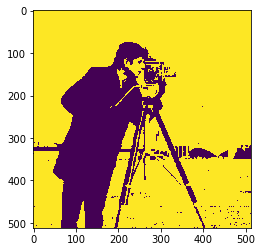

In [17]:
plt.imshow(binary==True)
plt.show()

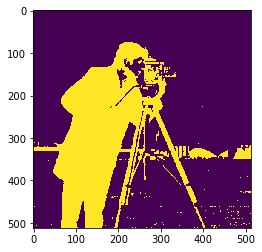

In [18]:
plt.imshow(binary==False)
plt.show()